# Extinction Color Examination


This is in no way similar to "notebooks/ModuleBCatalogCrossmatch.ipynb" but git thinks it is so I'm adding this to dissuade it.

In [1]:
%matplotlib inline

In [2]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [3]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [4]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [5]:
%run $basepath/analysis/analysis_setup.py

/blue/adamginsburg/adamginsburg/jwst/brick//reduction/filtering.py:29: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-063 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-065
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.661125 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526408297.850 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2024-06-29 07:19:49
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2024-06-29 23:27:00


In [6]:
%run $basepath/analysis/selections.py --module=merged1182_daophot_basic_bgsub_blur

/blue/adamginsburg/adamginsburg/jwst/brick/analysis/selections.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.661125 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526408297.850 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2024-06-29 07:19:49
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2024-06-29 23:27:00
Selecting module merged1182_daophot_basic_bgsub_blur

merged1182_daophot_basic_bgsub_blur
Selecting based on filters ['f410m', 'f212n', 'f466n', 'f405n', 'f187n', 'f182m', 'f444w', 'f356w', 'f200w', 'f115w']
1466 saturated in near_saturated_f212n_f212n
114 saturated in near_saturated_f466n_f466n
938 saturated in near_saturated_f405n_f405n
657 saturated in near_saturated_f187n_f187n
10719 saturated in near_saturated_f182m_f182m
25353 saturated in near_saturated_f444w_f444w
28364 saturated in near_saturated_f356w_f356w
36060 saturated in near_saturated_f200w_f200w
1747 saturated in near_saturated_f115w_f115w
62978 near saturated out of 1553496.  That leaves 1490518 not near unsaturated
1466 saturated in near_saturated_f212n_f212n
114 saturated 

# Extinction Measurements

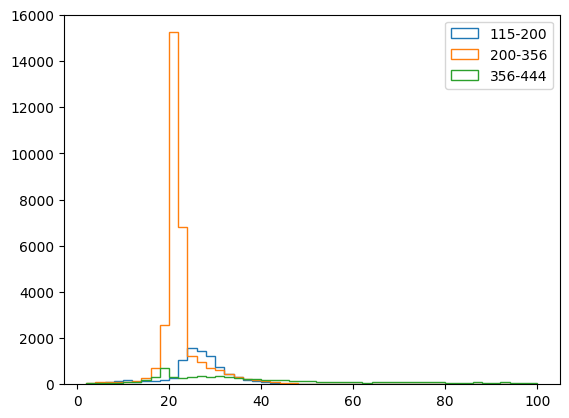

In [123]:
pl.hist(av115200[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='115-200')
pl.hist(av200356[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='200-356')
pl.hist(av356444[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='356-444')

pl.legend(loc='best');

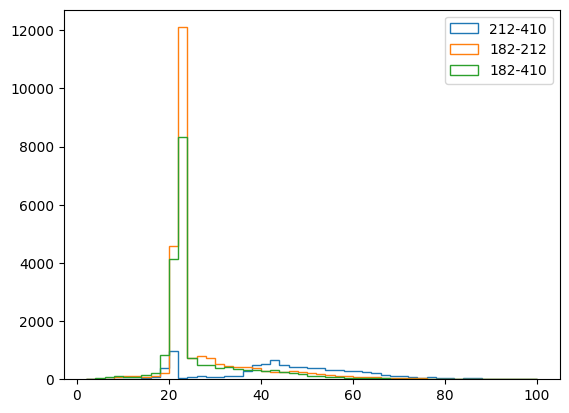

In [122]:
pl.hist(av212410[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='212-410')
pl.hist(av182212[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='182-212')
pl.hist(av182410[~magerr_gtpt05], histtype='step', bins=np.linspace(2,100), label='182-410')

pl.legend(loc='best');

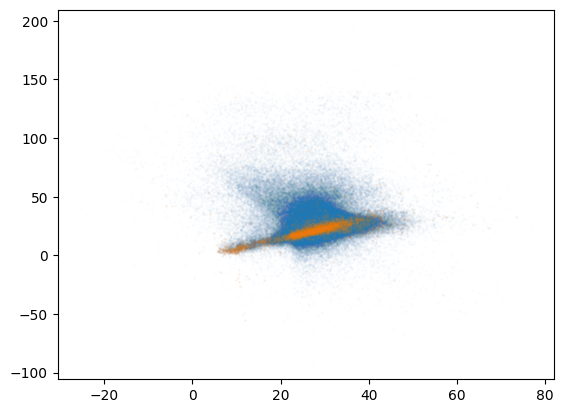

In [120]:
pl.scatter(av115200, av200356, alpha=0.01, s=1);
pl.scatter(av115200[~magerr_gtpt05], av200356[~magerr_gtpt05], alpha=0.05, s=1);

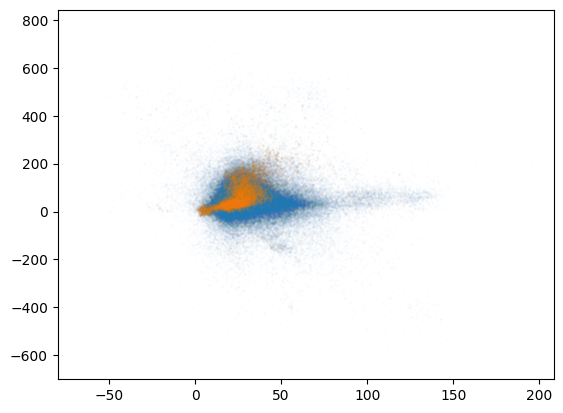

In [121]:
pl.scatter(av200356, av356444, alpha=0.01, s=1);
pl.scatter(av200356[~magerr_gtpt05], av356444[~magerr_gtpt05], alpha=0.05, s=1);

# Where are the extincted sources?

If we assume F212N-F410M (really 410-405) color is dominated by extinction, which seems like a good first assumption, where are the stars of different extinction?

Check this by making density plots of different magnitude cuts.

In [7]:
# not sure these are legitimately bad?
# Feb 11, 2023: these are the same objects as 'weird blue' above
badblue = blue_410_466 & ( ((basetable['mag_ab_f405n'] - basetable['mag_ab_f410m']) > 2) |
                          ((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) > -1) )
badblue.sum()

276

In [41]:
sel = ~any_saturated & ~badblue & oksep & (~magerr_gtpt1)
# this is what I had before but that's comparing to the BrA ... extcolor = basetable['mag_ab_f212n'] - basetable['mag_ab_405m410']
extcolor = basetable['mag_ab_f212n'] - basetable['mag_ab_410m405']

#crds[sel & (extcolor>0) & (extcolor<0.5)]

(array([3.0000e+00, 2.0000e+00, 1.2000e+01, 9.2000e+01, 3.8100e+02,
        2.9114e+04, 8.8758e+04, 9.0620e+03, 9.5100e+02, 9.4000e+01]),
 array([-8.13141741, -6.5924886 , -5.0535598 , -3.51463099, -1.97570218,
        -0.43677338,  1.10215543,  2.64108424,  4.18001304,  5.71894185,
         7.25787066]),
 <BarContainer object of 10 artists>)

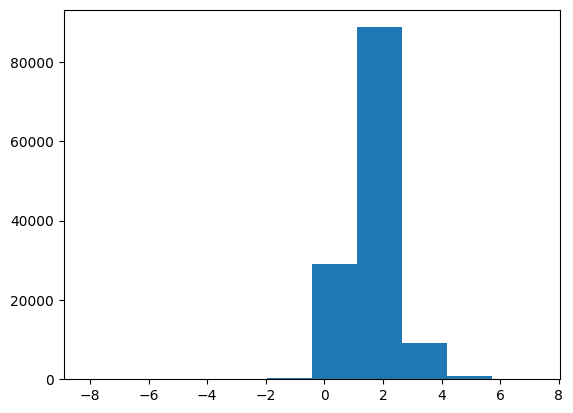

In [10]:
#pl.hist(basetable['mag_ab_405m410'])
#pl.hist(basetable['mag_ab_f212n'])
pl.hist(extcolor[np.isfinite(extcolor)])

In [90]:
bgfn=f'{basepath}/images/BrickJWST_merged_longwave_narrowband_lighter.png'
avm = pyavm.AVM.from_image(bgfn)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))
img_narrow = np.array(PIL.Image.open(bgfn))[::-1,:,:]
wwi_narrow, img_narrow.shape

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN' 'DEC--TAN' 
 CRVAL : 266.53557808187 -28.71296769346 
 CRPIX : 1174.6156255954 2851.4663520427 
 PC1_1 PC1_2  : 1.0 0.0 
 PC2_1 PC2_2  : 0.0 1.0 
 CDELT : -1.7473724308189e-05 1.7473724308189e-05 
 NAXIS : 2350  5725,
 (2350, 5725, 3))

In [94]:
def extinction_contour_plot(minext, maxext, extcolor=extcolor,
                            bgfn=f'{basepath}/images/BrickJWST_merged_longwave_narrowband_lighter.png'):
    avm = pyavm.AVM.from_image(bgfn)
    img_narrow = np.array(PIL.Image.open(bgfn))[::-1,:,:]
    wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

    #img_narrow = img_narrow.swapaxes(0,1)
    wwi_narrow = wwi_narrow.sub([2,1])

    fig = pl.figure(figsize=(12,4))
    ax = pl.subplot(projection=wwi_narrow)
    ax.imshow(img_narrow)

    s1 = (extcolor>minext) & (extcolor<maxext)
    
    crds = basetable['skycoord_ref']
    
    print(f'Matched {s1.sum()}')
    xx = np.linspace(crds.ra.min(), crds.ra.max(), 25).value
    yy = np.linspace(crds.dec.min(), crds.dec.max(), 25).value
    zz, xe, ye = np.histogram2d(crds[s1].ra.value, crds[s1].dec.value, bins=[xx, yy])
    cx = (xx[1:]+xx[:-1])/2
    cy = (yy[1:]+yy[:-1])/2
    pl.contour(cy, cx, zz, transform=ax.get_transform('world'));
    pl.colorbar();
    pl.title(f"Extinction color {minext} to {maxext} mag");

Matched 2603


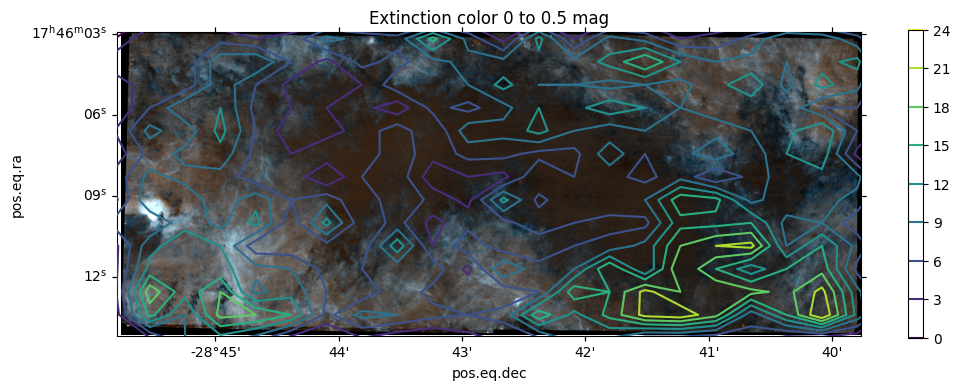

In [95]:
extinction_contour_plot(0, 0.5)

Matched 16816


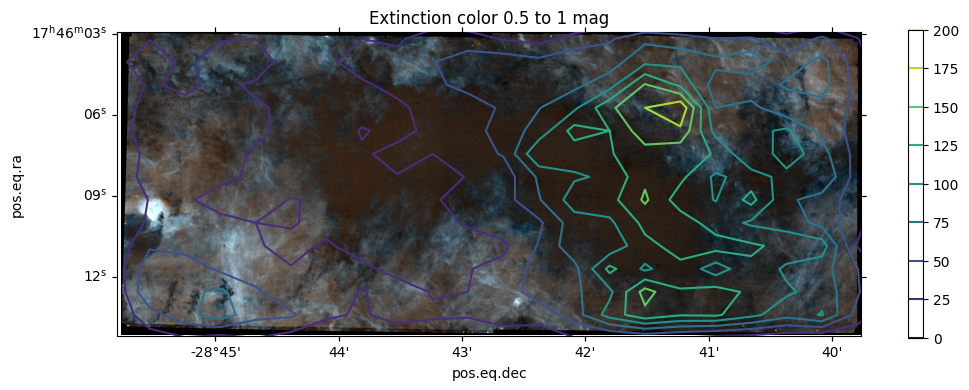

In [96]:
extinction_contour_plot(0.5, 1)

Matched 48123


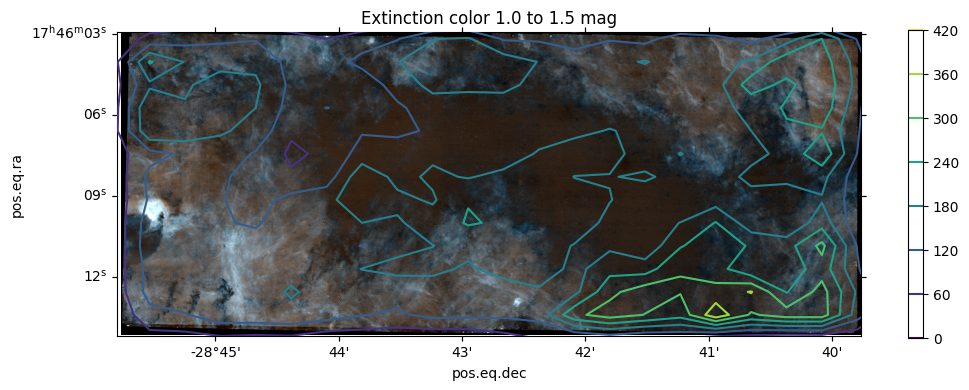

In [97]:
extinction_contour_plot(1.0, 1.5)

Matched 33314


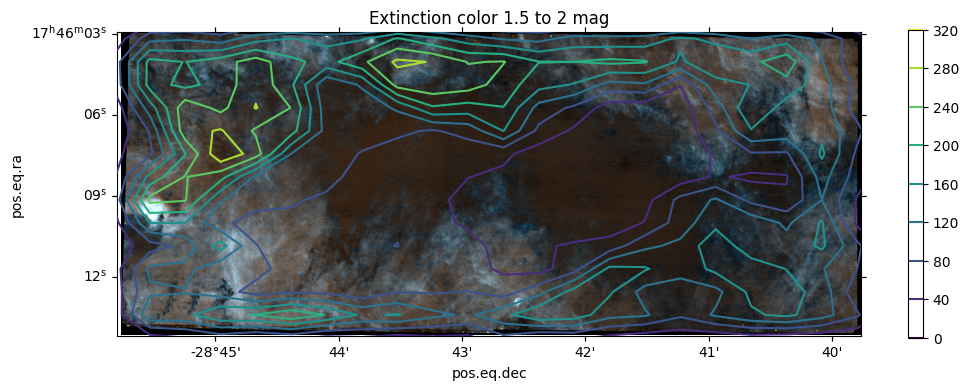

In [98]:
extinction_contour_plot(1.5, 2)

Matched 26668


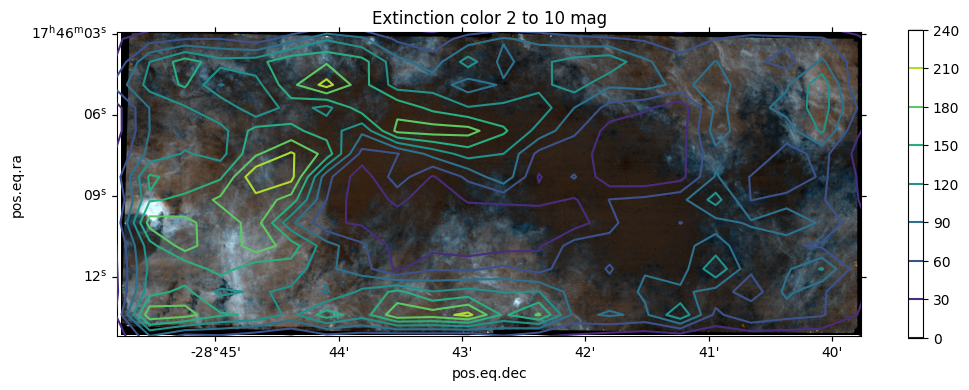

In [99]:
extinction_contour_plot(2, 10)

Matched 6363


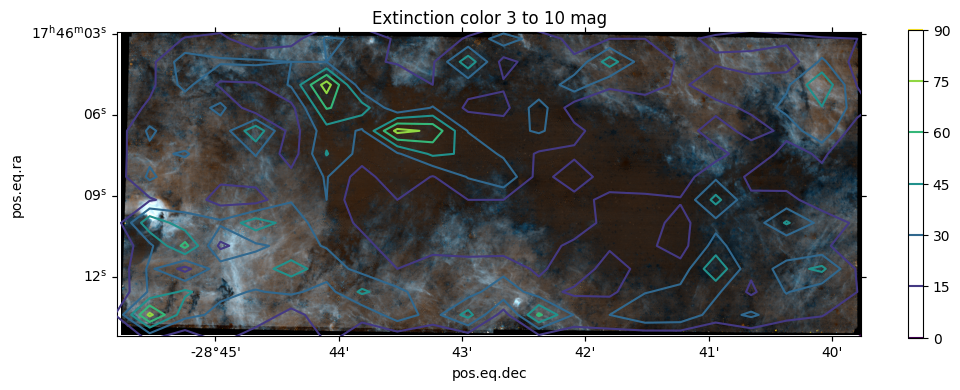

In [100]:
extinction_contour_plot(3, 10)

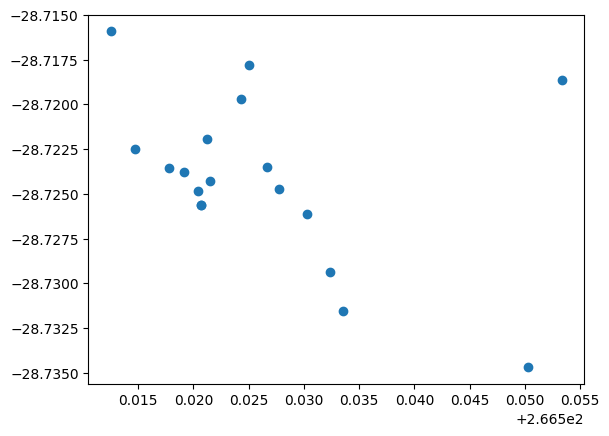

In [101]:
s1 = sel & (extcolor>4) & (extcolor<10)
xx = np.linspace(crds.ra.min(), crds.ra.max(), 25).value
yy = np.linspace(crds.dec.min(), crds.dec.max(), 25).value
zz, xe, ye = np.histogram2d(crds[s1].ra.value, crds[s1].dec.value, bins=[xx, yy])
cx = (xx[1:]+xx[:-1])/2
cy = (yy[1:]+yy[:-1])/2
pl.scatter(crds[s1].ra.deg, crds[s1].dec.deg)
#pl.contour(cx, cy, zz);
#pl.colorbar();

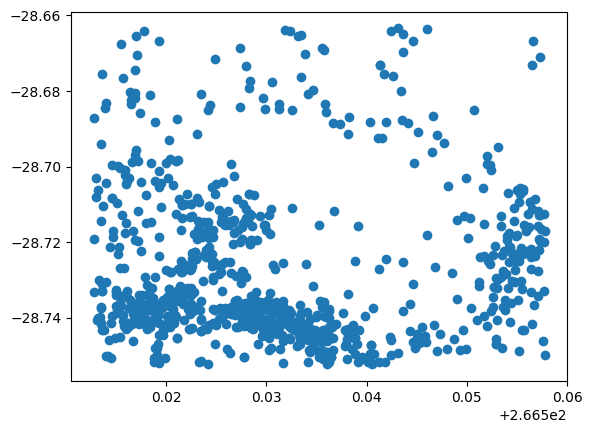

In [102]:
s1 = sel & (extcolor>2) & (extcolor<4)
xx = np.linspace(crds.ra.min(), crds.ra.max(), 25).value
yy = np.linspace(crds.dec.min(), crds.dec.max(), 25).value
zz, xe, ye = np.histogram2d(crds[s1].ra.value, crds[s1].dec.value, bins=[xx, yy])
cx = (xx[1:]+xx[:-1])/2
cy = (yy[1:]+yy[:-1])/2
pl.scatter(crds[s1].ra.deg, crds[s1].dec.deg)
#pl.contour(cx, cy, zz);
#pl.colorbar();

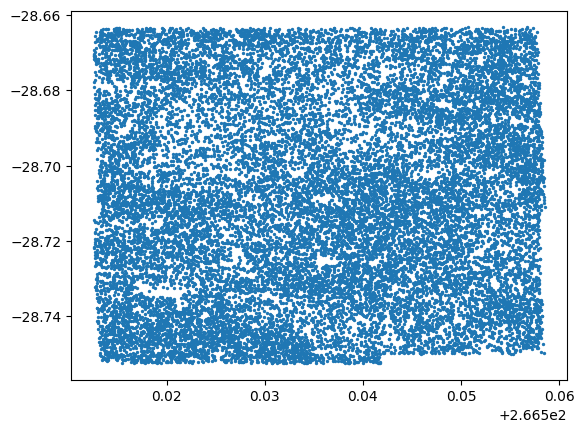

In [103]:
s1 = sel & (extcolor>1) & (extcolor<2)
xx = np.linspace(crds.ra.min(), crds.ra.max(), 25).value
yy = np.linspace(crds.dec.min(), crds.dec.max(), 25).value
zz, xe, ye = np.histogram2d(crds[s1].ra.value, crds[s1].dec.value, bins=[xx, yy])
cx = (xx[1:]+xx[:-1])/2
cy = (yy[1:]+yy[:-1])/2
pl.scatter(crds[s1].ra.deg, crds[s1].dec.deg, s=2)
#pl.contour(cx, cy, zz);
#pl.colorbar();

In [104]:
# "high extinction" stars (extcolor > 3)


avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[~magerr_gtpt1 & oksep & ~any_saturated & ~badblue & (extcolor > 3) & ~extcolor.mask],
    crds.ra[~magerr_gtpt1 & oksep & ~any_saturated & ~badblue & (extcolor > 3) & ~extcolor.mask],
    transform=ax.get_transform('world'),
    s=2,
    marker='x',
    facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);
ax.scatter(
    crds.dec[(~magerr_gtpt1) & oksep & (~any_saturated) & (~badblue) & (extcolor > 7) & ~extcolor.mask],
    crds.ra[(~magerr_gtpt1) & oksep & (~any_saturated) & (~badblue) & (extcolor > 7) & ~extcolor.mask],
    transform=ax.get_transform('world'),
    s=2,
    marker='x',
    facecolors=(1, 0.2, 0.1),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
# fig.savefig(f"{basepath}/images/ExtinctedStars_on_RGB.png", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/blue/adamginsburg/adamginsburg/jwst/brick//images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'

In [ ]:
(extcolor > 12).sum()

In [ ]:
extcolor[(~magerr_gtpt1) & oksep & (~any_saturated) & (~badblue) & (extcolor > 12)].mask

In [ ]:
basetable['mag_ab_405m410'].mask.sum()

In [ ]:
(basetable['sep_f212n'] > 0.1*u.arcsec).sum()

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']

# expanded sample
#oksep = np.logical_or.reduce([basetable[f'sep_{filtername}'] for filtername in filternames[1:]])
blue_410_466_incl = (~any_saturated &
                     ((basetable['mag_ab_410m405'] - basetable['mag_ab_f466n']) +
                      (basetable['emag_ab_f410m']**2 + basetable['emag_ab_f466n']**2 + basetable['emag_ab_f405n']**2)**0.5 < -1.75))
thissel = (~magerr_gtpt1 & oksep & ~any_saturated & ~badblue &
           ~basetable['mag_ab_410m405'].mask &
           blue_410_466_incl &
           (basetable['sep_f212n'] > 0.1*u.arcsec))

ax.scatter(
    crds.dec[thissel],
    crds.ra[thissel],
    transform=ax.get_transform('world'),
    s=2,
    marker='x',
    facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);

#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
pl.title("Blue F410M-F466N stars")
# fig.savefig(f"{basepath}/images/ExtinctedStars_on_RGB.png", bbox_inches='tight')

In [ ]:
# This image shows only H-alpha stars
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']

# expanded sample ("incl" for "inclusive")
#oksep = np.logical_or.reduce([basetable[f'sep_{filtername}'] for filtername in filternames[1:]])
blue_410_466_incl = (~any_saturated &
                     ((basetable['mag_ab_410m405'] - basetable['mag_ab_f466n']) +
                      (basetable['emag_ab_f410m']**2 + basetable['emag_ab_f466n']**2 + basetable['emag_ab_f405n']**2)**0.5 < -1.75))
thissel = (oksep & ~any_saturated & ~badblue &# ~magerr_gtpt1 &
           ~basetable['mag_ab_410m405'].mask &
           blue_410_466_incl)

ax.scatter(
    crds.dec[thissel],
    crds.ra[thissel],
    transform=ax.get_transform('world'),
    s=5,
    marker='x',
    facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);

#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
pl.title("Blue F410M-F466N stars, but allowing for greater magnitude errors")
# fig.savefig(f"{basepath}/images/ExtinctedStars_on_RGB.png", bbox_inches='tight')